Part 1: Creating helper functions

In [486]:
import numpy as np
import pandas as pd

1. Create a helper function to calculate Gini impurity called “calcGini”. This function should take in two values which represent a count of each class (we can assume only two classes for this problem set) and output the Gini impurity. For example, if you were to pass in 2 of the same number for the counts of classes (let’s say 5 and 5), the calculated Gini impurity should be 0.5.

In [ ]:
def calcGini(a,b):
    p1 = (a/(a+b))
    p2 = 1.0 - p1
    return 1-(np.square(p1))-(np.square(p2))

In [488]:
calcGini(8,8)

0.5

2. Create a helper function to calculate entropy called “calcEntropy”. This function should take in two values which represent a count of each class (we can assume only two classes for this problem set) and output the entropy. (Note: be sure the function appropriately accounts for zero values) For example, if you were to pass in 2 of the same number for the counts of classes (let’s say 5 and 5), the calculated entropy should be 1.0.

In [489]:
def calcEntropy(a,b):
    p1 = (a/(a+b))
    p2 = 1.0 - p1
    vals = np.array([p1,p2])
    logs = np.log2(vals)
    logs[logs == -np.inf] = 0 
    e = np.sum(-1*(vals * logs))
    #np.log2()
    print(logs)
    return e

In [490]:
calcEntropy(5,5)

[-1. -1.]


1.0

3. Create a helper function to calculate weighted sums called “weightedSums”. This function should take in two lists - one of values and one of weights/counts - and should output the weighted average of the values as weighted by weights/counts. For example, if you pass in a list that contains [1, 2, 3, 4] as the values and a list that contains [4, 3, 2, 1] as the weights, the weighted average should be 2.0.

In [329]:
def weightedSum(values, weights):
    return np.average(values, weights = weights)

In [330]:
vals = [1,2,3,4]
ws = [4,3,2,1]
weightedSum(vals,ws)

2.0

4. Verify that your functions are working as expected. Use the same dataset/calculations from lecture and calculate the Gini impurity and entropy for each column. The data can be found in the toyData.csv file. Use this to verify that your functions work as expected.

In [343]:
toyData = pd.read_csv('/Users/leechenhsin/Desktop/Study@USA/07_UW_School/IMT575/toyData.csv')
toyData

,Variable A,Variable B,Variable C,Output
0,Yes,On,High,Red
1,No,Off,Low,Blue
2,Yes,On,High,Red
3,Yes,Off,High,Red
4,No,On,High,Blue
5,Yes,On,Low,Blue
6,No,Off,High,Blue
7,No,On,High,Blue
8,Yes,On,Low,Blue
9,Yes,Off,High,Red


In [397]:
variable_A=toyData.loc[:,"Variable A"]
variable_B=toyData.loc[:,"Variable B"]
variable_C=toyData.loc[:,"Variable C"]
label=toyData.loc[:,"Output"]

In [398]:
YesR, YesB, NoR, NoB=0,0,0,0
OnR, OnB, OffR, OffB=0,0,0,0
HR, HB, LR, LB=0,0,0,0

In [399]:
for i in range(len(toyData)):
    val, output = toyData.iloc[i,0], toyData.iloc[i,3]
    if val == 'Yes' and output == 'Red':
        YesR +=1
    elif val == 'Yes' and output == 'Blue':
        YesB +=1
    elif val == 'No' and output == 'Red':
        NoR +=1
    else:
        NoB +=1

In [400]:
for i in range(len(toyData)):
    val, output = toyData.iloc[i,1], toyData.iloc[i,3]
    if val == 'On' and output == 'Red':
        OnR +=1
    elif val == 'On' and output == 'Blue':
        OnB +=1
    elif val == 'Off' and output == 'Red':
        OffR +=1
    else:
        OffB +=1

In [401]:
for i in range(len(toyData)):
    val, output = toyData.iloc[i,2], toyData.iloc[i,3]
    if val == 'High' and output == 'Red':
        HR +=1
    elif val == 'High' and output == 'Blue':
        HB +=1
    elif val == 'Low' and output == 'Red':
        LR +=1
    else:
        LB +=1

In [402]:
def total_gini_entropy(num_1,num_2,num_3,num_4):
    gini=((num_1+num_2)/10)*calcGini(num_1,num_2)+((num_3+num_4)/10)*calcGini(num_3,num_4)
    entropy=((num_1+num_2)/10)*calcEntropy(num_1,num_2)+((num_3+num_4)/10)*calcEntropy(num_3,num_4)
    return gini,entropy

In [403]:
output_A=total_gini_entropy(YesR,YesB,NoR,NoB)
output_B=total_gini_entropy(OnR,OnB,OffR,OffB)
output_C=total_gini_entropy(HR,HB,LR,LB)


[-0.5849625 -1.5849625]
[0. 0.]
[-1.5849625 -0.5849625]
[-1. -1.]
[-0.80735492 -1.22239242]
[0. 0.]


<ipython-input-327-45bb5bb0dcfc>:5: RuntimeWarning: divide by zero encountered in log2
  logs = np.log2(vals)


In [404]:
print("Variable A: Gini is {:.2f} Entropy is {:.2f}".format(output_A[0],output_A[1]))
print("Variable B: Gini is {:.2f} Entropy is {:.2f}".format(output_B[0],output_B[1]))
print("Variable C: Gini is {:.2f} Entropy is {:.2f}".format(output_C[0],output_C[1]))

Variable A: Gini is 0.27 Entropy is 0.55
Variable B: Gini is 0.47 Entropy is 0.95
Variable C: Gini is 0.34 Entropy is 0.69


Part 2: Building trees

5. Import the California housing dataset using sklearn.datasets.
What are some interesting characteristics of this variable? Plot the highPriced variable in relation to other variables in the data (using pandas scatter matrix may help).
What do you see?

In [41]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [42]:
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [43]:
california_housing.data.head()
df_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

In [44]:
df_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [57]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [79]:
california_housing.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

For california housing target data, it contains the concept of prediction of housing prices.It is interesting that the minimun of the housing price is 0.149 and the mean of the houding price is 2.068. It contains a board range of the housing price. 

In [85]:
highPriced=[]
for i in range(len(california_housing.target)):
    highPriced.append(1) if california_housing.target[i] > 3.5 else highPriced.append(0)

In [87]:
h = np.column_stack((california_housing.data,highPriced))

In [423]:
h = np.column_stack((california_housing.data,highPriced))
h_dataFrame=pd.DataFrame(h, columns=['MedInc','HouseAge','AveRooms','AveBedrms','Population',
                                     'AveOccup','Latitude','Longitude','highPriced'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1395a75e0>,
      dtype=object)

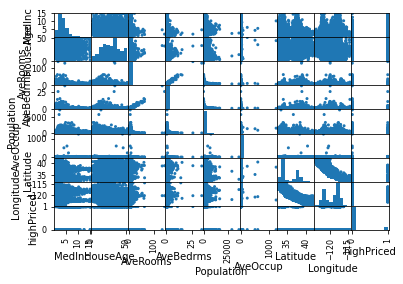

In [424]:
pd.plotting.scatter_matrix(frame=h_dataFrame,alpha=1)

In this plot, I see the highpriced and different variables such as MedInc,HouseAge,AveRooms,AveBedrms,Population, AveOccup,Latitude,Longitude has less correlation. They don't show in a clear correlation. 

6. Using your helper functions and with highPriced as your output, find what the best split is along the Population variable using each of Gini impurity and entropy as the splitting criterion. (Hint: it may help to build this process as a function because you will be doing it many times throughout this problem set.) To do this for a continuous variable, iterate through each possible value in the column and assume the “left” side of each split contains all values less than and the “right” side contains all values equal to or greater than. What is the optimal split point when using Gini impurity? What about when using entropy? What if we calculate splits for the AveRooms variable using both Gini impurity and entropy? Comment on any similarities and differences when using the different metrics.

In [478]:
h_dataFrame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,highPriced
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.0


In [485]:
import numpy as np
 
def split_numerical(attribute_index, thresh, datasets):
    left, right = [], []
    for r in datasets:
        if r[attribute_index] < thresh:
            left.append(r)
        else:
            right.append(r)
    return left, right

In [471]:
def cal_gini(split_datas, labels):
    N = sum([len(d) for d in split_datas])
    gini_S_A = 0
    for d in split_datas:
        N_t = len(d)
        if N_t == 0:
            continue
        sum_p_tk = 0
        for label in labels:
            p_tk = [r[-1] for r in d].count(label) / N_t
            sum_p_tk += p_tk * p_tk
        gini_S = 1 - sum_p_tk
        gini_S_A = N_t / N * gini_S
    return gini_S_A

from collections import Counter
import math

In [472]:
def cal_entropy(dataset):
    n = len(dataset)
    data_temp=np.array(dataset)
    labels = Counter(data_temp[:, -1])
    entropy = 0.0
    for k, v in labels.items():
        prob = v / n
        entropy -= prob * math.log(prob, 2)
    return entropy

In [473]:
def split_all_attributes(datasets,index):
    labels = list(set([r[-1] for r in datasets]))
    best_attribute_index, best_thresh, best_gini, best_entropy, best_split_datas = 999, 999, 999, 999, None
    for attribute_index in range(len(datasets[0]) - 1):
        for r in datasets:
            thresh = r[attribute_index]
            split_datas = split_numerical(attribute_index, thresh, datasets)
            if index ==1:
                gini = cal_gini(split_datas, labels)
                if gini < best_gini:
                    best_attribute_index, best_thresh, best_gini, \
                    best_split_datas = attribute_index, thresh, gini, split_datas
            else:
               entropy = cal_entropy(datasets)
               if entropy < best_entropy:
                    best_attribute_index, best_thresh, best_entropy, \
                    best_split_datas = attribute_index, thresh, entropy, split_datas
                
        root = {'best_attribute_index': best_attribute_index, 'best_thresh': best_thresh,
                'best_split_datas': best_split_datas}
    #return root
    return best_thresh

In [474]:
Pop_data=h_dataFrame['Population']
target = h_dataFrame['highPriced']
Pop_datasets = np.c_[Pop_data, target].tolist()

Rooms_data=h_dataFrame['AveRooms']
target = h_dataFrame['highPriced']
Rooms_datasets = np.c_[Rooms_data, target].tolist()

In [476]:
#### index=1 is gini and index=0 is entropy
index=1
Pop_gini=split_all_attributes(Pop_datasets,index)
#print(Pop_gini)
print('Gini optimal split point for Population {:.2f}:'.format(Pop_gini))

Rooms_gini=split_all_attributes(Rooms_datasets,index)
#print(Rooms_gini)
print('Gini optimal split point for AveRooms {:.2f}:'.format(Rooms_gini))



Gini optimal split point for Population 28566.00:
Gini optimal split point for AveRooms 141.91:


In [515]:
index=0   
Pop_entropy=split_all_attributes(Pop_datasets,index)
#print(Pop_entropy)
print('Entropy optimal split point for Population {:.2f}:'.format(Pop_entropy))

Rooms_entropy=split_all_attributes(Rooms_datasets,index)
#print(Rooms_entropy)
print('Gini optimal split point for AveRooms {:.2f}:'.format(Rooms_entropy))

Entropy optimal split point for Population 322.00:


KeyboardInterrupt: 

7. Import sklearn’s DecisionTreeClassifier and find the optimal split along the Pop- ulation variable using entropy. Show that the optimal value as calculated by sklearn’s classifier is 1183.5. If this is different than what you calculated, explain why and adjust your outputs so it gives you the same value. (Hint: you may have implemented a splitting method that looked at axis-aligned splits at each data point whereas sklearn looks at axis-aligned splits between each pair of data points. In other words, if your data contained [1, 2, 3, 4], you may have split at ≥ 1, at ≥ 2, at ≥ 3, etc. sklearn may instead look at splits between 1 and 2, 2 and 3, etc.)

In [242]:
h3=h2.iloc[:,0]
h3

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: Population, Length: 20640, dtype: float64

In [243]:
target=h2.iloc[:,1]
target

0        1.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
20635    0.0
20636    0.0
20637    0.0
20638    0.0
20639    0.0
Name: highPriced, Length: 20640, dtype: float64

In [244]:
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(criterion="entropy",splitter="best", max_depth=2)


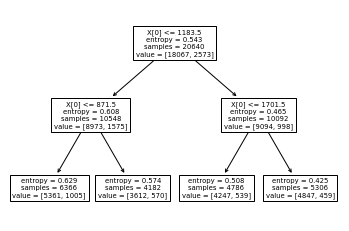

In [247]:
clf=tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=2)
h3=np.array(h3)
h3=h3.reshape(-1, 1)
target=np.array(target)
target=target.reshape(-1,1)

clf = clf.fit(h3, target)
tree.plot_tree(clf)
plt.show()

In [468]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold


In [466]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 7 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 0] <= 6.584399938583374 else to node 4.
	node=1 is a split node: go to node 2 if X[:, 0] <= 5.278800010681152 else to node 3.
		node=2 is a leaf node.
		node=3 is a leaf node.
	node=4 is a split node: go to node 5 if X[:, 0] <= 7.955650091171265 else to node 6.
		node=5 is a leaf node.
		node=6 is a leaf node.


8. Using the HouseAge, AveBedrms, and AveOccup variables, build a decision tree with 2 levels (3 split points, 4 leaf nodes) based on entropy. Show the splits in an easily readable way (a printed table or dataframe may work best). One way is a table with the following columns: level (indicates which level of the tree the split occurs. You should have a 1 once and 2 twice), col (indicates the column across which the split occurs), and threshold (indicates the threshold used in the split). Keep in mind that when building this tree, each split necessitates that you find the optimal split for that data subset across all three variables. Your output should resemble the table below.

In [220]:
x_train_dataFrame2=x_train_dataFrame.iloc[:,[1,3,5]]
x_train_dataFrame2

x_test_dataFrame2=x_test_dataFrame.iloc[:,[1,3,5]]
x_test_dataFrame2

,HouseAge,AveBedrms,AveOccup
6495,32.0,0.893564,3.175743
17285,29.0,1.104089,2.613383
18580,20.0,1.044262,3.531148
16960,43.0,0.986523,2.652291
19545,39.0,1.003306,3.383471
...,...,...,...
6320,22.0,1.053648,2.803648
11055,16.0,1.096567,1.948498
10060,17.0,1.036538,2.673077
4495,34.0,1.076923,3.349112


0.887409200968523

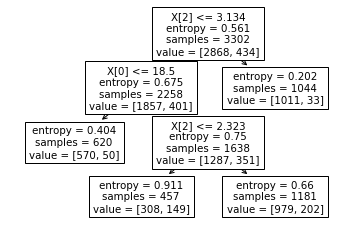

In [228]:
from sklearn.tree import DecisionTreeClassifier
clf3 = tree.DecisionTreeClassifier(criterion="entropy",min_samples_split=3,max_leaf_nodes=4)
clf3.fit(x_train_dataFrame2, y_train)
tree.plot_tree(clf3)
clf3.score(x_test_dataFrame2,y_test)

9. Visualize your splits on an X-Y plane. Set the x-axis to be AveOccup and the y-axis to be HouseAge. Plot the target variable and use straight lines to indicate the axis-aligned splits for your 2-level decision tree like we did in lecture. Make sure your visualization is understandable and comment on what you see. How do the splits look? It may help to reduce the plotting range across AveOccup to be [0, 10] and the plotting range across HouseAge to be [0, 50]. It may also help to have a color indicating highPriced with the highPriced points layered on top of the non-highPriced points (as there are fewer of them). It may also help to change the transparency of the points.

In [229]:
import matplotlib.pyplot as plt

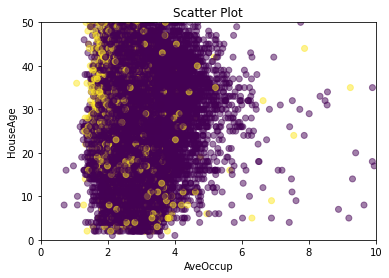

In [422]:
plt.scatter('AveOccup','HouseAge',c='highPriced', data=h_dataFrame,alpha=0.5)
plt.xlim([0,10])
plt.ylim([0,50])
plt.xlabel('AveOccup')
plt.ylabel('HouseAge')
plt.title("Scatter Plot") 

plt.show()


Part 3: Making predictions

10. Create a training/test split for your data. Assume the data is already randomized and select every 5th observation from the original dataset to be in your test data (i.e. when working in Pandas, your test dataframe should contain index 0, 5, 10, 15, ...) and all other observations in your training data. How many observations are in your training and test datasets, respectively? How does the target variable look across the two datasets?

In [451]:
h_dataFrame.iloc[::5, :]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,highPriced
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1.0
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,0.0
10,3.2031,52.0,5.477612,1.079602,910.0,2.263682,37.85,-122.26,0.0
15,2.1250,50.0,4.242424,1.071970,697.0,2.640152,37.85,-122.26,0.0
20,1.3578,40.0,4.524096,1.108434,409.0,2.463855,37.85,-122.27,0.0
...,...,...,...,...,...,...,...,...,...
20615,2.3598,23.0,5.461929,1.096447,724.0,3.675127,39.08,-121.54,0.0
20620,4.5625,40.0,4.125000,0.854167,151.0,3.145833,39.05,-121.48,0.0
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52,0.0
20630,3.5673,11.0,5.932584,1.134831,1257.0,2.824719,39.29,-121.32,0.0


In [452]:
h_dataFrame_predict = h_dataFrame.iloc[::5,8]
h_dataFrame_predict

0        1.0
5        0.0
10       0.0
15       0.0
20       0.0
        ... 
20615    0.0
20620    0.0
20625    0.0
20630    0.0
20635    0.0
Name: highPriced, Length: 4128, dtype: float64

In [453]:
from sklearn.model_selection import train_test_split
x=df_data.iloc[::5, :]
y=h_dataFrame_predict

x_train, x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=13579)


If I use train and test_size=0.2, for train dataset,it contains 3302 rows. For test dataset, it contains 826 rows. For the target dataset-highPriced, it also contains 3302 rows for train dataset. For the test dataset-highPriced, it also contains  826rows for tesr dataset. 


11. Use sklearn’s DecisionTreeClassifier to create a decision tree that is trained on the training data with only the MedInc variable. Train it on your training dataset and make predictions for your test dataset. How do the predictions from this classifier fare? Discuss the accuracy of the classifier as well as performance across other metrics.

In [454]:
from sklearn.tree import DecisionTreeClassifier

x_train1=x_train.iloc[:, 0]
x_train1
x_test1=x_test.iloc[:, 0]
x_test1

x_train1_dataFrame=pd.DataFrame(x_train1, columns=['MedInc'])
x_test1_dataFrame=pd.DataFrame(x_test1, columns=['MedInc'])
x_train1_dataFrame

,MedInc
14935,4.9792
1200,1.9100
3045,3.2279
5740,4.9135
20460,6.6073
...,...
4910,1.8652
2335,3.1814
4955,2.5263
13790,3.4695


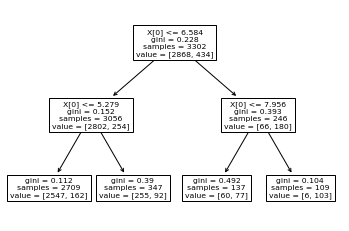

In [462]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(x_train1_dataFrame, y_train)
tree.plot_tree(clf)
predict=clf.predict(x_test1_dataFrame)

In [464]:
from sklearn.metrics import classification_report
print('Accuracy:',classification_report(y_test, predict))
clf.score(x_test1_dataFrame,y_test)    

Accuracy:               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       733
         1.0       0.73      0.46      0.57        93

    accuracy                           0.92       826
   macro avg       0.83      0.72      0.76       826
weighted avg       0.91      0.92      0.91       826



0.9200968523002422

When the training dataset with only the MedInc variable is discussed, the accurancy is 0.9200968523002422.

Discuss the accuracy of the classifier as well as performance across other metrics：
For the macro avg, it means the average precision of other non-calculted variables such as 0.0 and 1.0, it is (0.96+0.57)/2=0.76.


When the training dataset contains other variables is discussed, the accurancy is 0.9200968523002422. 

12. Use sklearn’s BaggingClassifier to create a bagging classifier whose base is a Deci- sionTreeClassifier with 2 levels, uses entropy as the split criterion, and is trained with only the MedInc variable. Train it on your training dataset and make predictions for your test dataset. How does this bagging classifier perform compared to the decision tree you created in question 11?

In [458]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [459]:
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(x_train1_dataFrame, y_train)

In [470]:
ytest_pred=bag_model.predict(x_test1_dataFrame)
print(bag_model.score(x_test1_dataFrame,y_test))

0.864406779661017


This BaggingClassifier has a worser performance of the decision tree I created in question 11.

13. Use sklearn’s RandomForestClassifier to create a random forest classifier whose base is a decision tree with 2 levels, uses entropy as the split criterion, and is trained with only the MedInc variable. Train it on your training dataset and make predictions for your test dataset. How does this random forest classifier perform compared to the classifiers you created in questions 11 and 12? Would you expect the performance to be vastly different than that of the bagging classifier?

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [182]:
dtc1 = DecisionTreeClassifier(criterion="entropy")
RandomForest_model=RandomForestClassifier(max_depth=2, random_state=0)
RandomForest_model=RandomForest_model.fit(x_train1_dataFrame, y_train)

In [183]:
ytest_pred=RandomForest_model.predict(x_test1_dataFrame)
print(RandomForest_model.score(x_test1_dataFrame,y_test))

0.9200968523002422


This RandomForestClassifier has the same performance of the decision tree with that I created in question 11. Besides, it has a better performacne of the decision tree with that I created in question 12.

14. Train a DecisionTreeClassifier, a BaggingClassifier, and a RandomForestClassifier using all features in the data except PRICE and highPriced. Again use entropy as a split criterion and 2 levels for the trees Train it on your training dataset and make predictions for your test dataset. How do these classifiers perform compared to each other? How do they perform compared to the classifiers you built in questions 11, 12, and 13? What can you say about how the random forest classifier performs in this instance?

0.9200968523002422

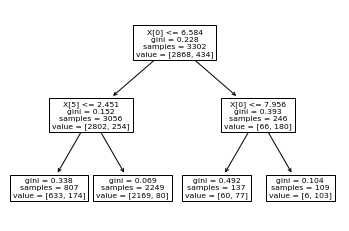

In [408]:
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(x_train_dataFrame, y_train)
tree.plot_tree(clf)
clf.score(x_test_dataFrame,y_test)

In [185]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification


In [186]:
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(x_train_dataFrame, y_train)

ytest_pred=bag_model.predict(x_test_dataFrame)
print(bag_model.score(x_test_dataFrame,y_test))

0.9443099273607748


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [188]:
dtc1 = DecisionTreeClassifier(criterion="entropy")
RandomForest_model=RandomForestClassifier(max_depth=2, random_state=0)
RandomForest_model=RandomForest_model.fit(x_train_dataFrame, y_train)

ytest_pred=RandomForest_model.predict(x_test_dataFrame)
print(RandomForest_model.score(x_test_dataFrame,y_test))

0.9092009685230025


Among these classifiers, the second one, baggingclassifier has the highest accurancy 0.944309.
Compared to classifiers I built in questions 11, 12, and 13, all features training model in 14 has a better performance. 

I would say that random forest classifier performs the worst among those classification methods. 